In [2]:
from dataset import *
from model import *
import torch
import numpy as np
from PIL import Image
from torchvision.transforms.functional import to_tensor, to_pil_image

In [3]:
# Hyperparameters.
seed = 0
batch_size = 1
num_slots = 7
num_iterations = 3
resolution = (128, 128)

In [4]:
resolution = (128, 128)
model = SlotAttentionAutoEncoder(resolution, num_slots, num_iterations, 64)
model.load_state_dict(torch.load('./experiments/debut/weights/model370.ckpt')['model_state_dict'])

<All keys matched successfully>

In [5]:
test_set = CLEVR(root='/viscam/data/clevr' ,split='test')

In [6]:
model = model.to(device)
image = test_set[2]['image']
image = image.unsqueeze(0).to(device)
to_pil_image(image[0]).show()
recon_combined, recons, masks, slots = model(image)

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


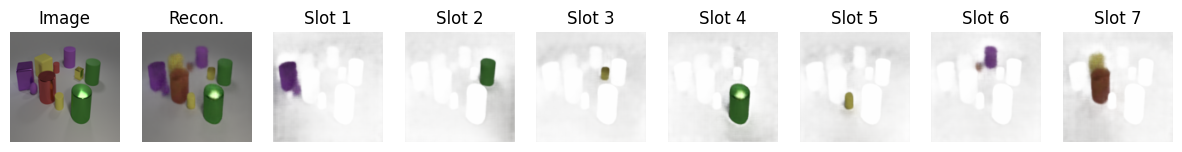

In [7]:
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance
fig, ax = plt.subplots(1, num_slots + 2, figsize=(15, 2))
image = image.squeeze(0)
recon_combined = recon_combined.squeeze(0)
recons = recons.squeeze(0)
masks = masks.squeeze(0)
image = image.permute(1,2,0).cpu().numpy()
recon_combined = recon_combined.permute(1,2,0)
recon_combined = recon_combined.cpu().detach().numpy()
recons = recons.cpu().detach().numpy()
masks = masks.cpu().detach().numpy()
ax[0].imshow(image)
ax[0].set_title('Image')
ax[1].imshow(recon_combined)
ax[1].set_title('Recon.')
for i in range(7):
  picture = recons[i] * masks[i] + (1 - masks[i])
  ax[i + 2].imshow(picture)
  ax[i + 2].set_title('Slot %s' % str(i + 1))
for i in range(len(ax)):
  ax[i].grid(False)
  ax[i].axis('off')